In [129]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
plt.rcParams.update({'font.size': 18})

def eventfile_to_dict(file):
    output = {}
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag in output:
                output[v.tag].append(v.simple_value)
            else:
                output[v.tag] = [v.simple_value]
    return output

# def plot_mean_std(x,ys,yerrors,labels):
#     for i,label in enumerate(labels):
#         plt.plot(x,ys[i])
#         plt.fill_between(x,ys[i]-yerrors[i],ys[i]+yerrors[i],alpha=0.3,label=label)
    # plt.legend()
    
def plot_mean_std(ys,yerrors,labels):
    for i,label in enumerate(labels):
        x = range(len(ys[i]))
        plt.plot(x,ys[i])
        plt.fill_between(x,ys[i]-yerrors[i],ys[i]+yerrors[i],alpha=0.3,label=label)
        
def single_figure(logdir, label_inds, title='', save=None):
    i,j = label_inds
    eval_means = []
    eval_stds = []
    labels = []
    for file in glob.glob(logdir):
        result = eventfile_to_dict(file)
        labels.append('_'.join(file.split('_')[i:j]))
        try:
            eval_means.append(np.array(result['Eval_AverageReturn']))
            eval_stds.append(np.array(result['Eval_StdReturn']))
        except:
            eval_means.append(np.zeros(1))
            eval_stds.append(np.zeros(1))
            
    plt.figure(figsize=(12,5))
    plot_mean_std(eval_means,eval_stds,labels)
    plt.xlabel('Number of iterations')
    plt.ylabel('Mean return')
    plt.legend(bbox_to_anchor=(1.03, 1.03))
    plt.title(title)
    plt.grid()
    plt.tight_layout()
    if save:
        plt.savefig(f'../../report/{save}.png',dpi=100)   

# Experiment 1

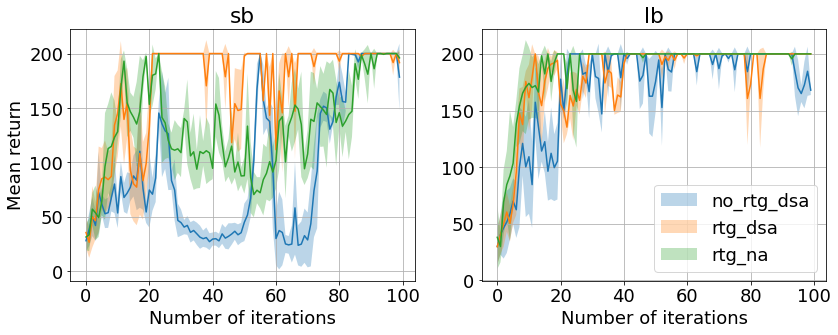

In [66]:
runs = ['sb','lb']
labels = ['no_rtg_dsa','rtg_dsa','rtg_na']
plt.figure(figsize=(12,5))
for i,run in enumerate(runs):
    plt.subplot(1,2,i+1)
    for label in labels:
        logdir = f'../../data/q2_pg_q1_{run}_{label}_*/events*'
        # label = '_'.join(file.split('_')[4:-3])
        result = eventfile_to_dict(glob.glob(logdir)[0])

        eval_means = np.array([result['Eval_AverageReturn']])
        eval_stds= np.array([result['Eval_StdReturn']])
        plot_mean_std(range(eval_means.shape[1]),eval_means,eval_stds,[label])
    plt.title(run)
    plt.xlabel('Number of iterations')
    if i == 0:
        plt.ylabel('Mean return')
    if i == len(runs)-1:
        plt.legend(loc='lower right')
    plt.grid()
plt.tight_layout()
plt.savefig('../../report/q1.png',dpi=100)

# Experiment 2

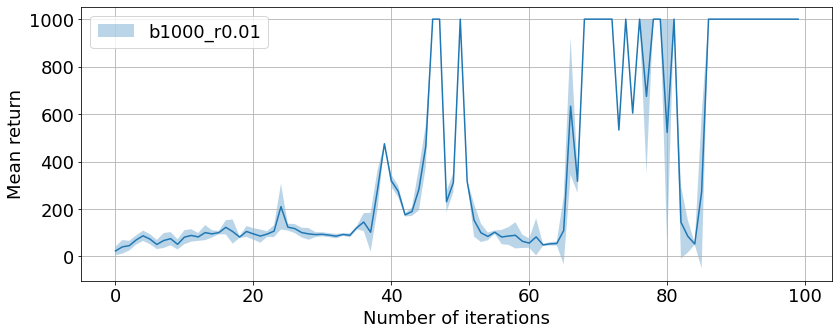

In [70]:
label = 'b1000_r0.01'
plt.figure(figsize=(12,5))
logdir = f'../../data/q2_pg_q2_b1000_*/events*'
result = eventfile_to_dict(glob.glob(logdir)[0])

eval_means = np.array([result['Eval_AverageReturn']])
eval_stds= np.array([result['Eval_StdReturn']])
plot_mean_std(range(eval_means.shape[1]),eval_means,eval_stds,[label])
plt.xlabel('Number of iterations')
plt.ylabel('Mean return')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.savefig('../../report/q2.png',dpi=100)

# Experiment 3

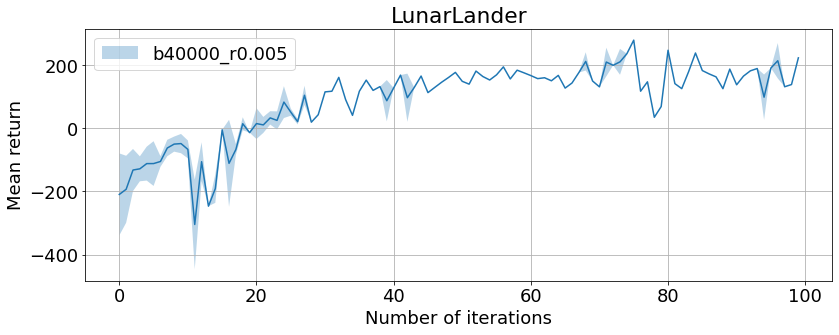

In [74]:
label = 'b40000_r0.005'
plt.figure(figsize=(12,5))
logdir = f'../../data/q2_pg_q3*/events*'
result = eventfile_to_dict(glob.glob(logdir)[0])

eval_means = np.array([result['Eval_AverageReturn']])
eval_stds= np.array([result['Eval_StdReturn']])
plot_mean_std(range(eval_means.shape[1]),eval_means,eval_stds,[label])
plt.xlabel('Number of iterations')
plt.ylabel('Mean return')
plt.legend(loc='upper left')
plt.title('LunarLander')
plt.grid()
plt.tight_layout()
plt.savefig('../../report/q3.png',dpi=100)

# Experiment 4

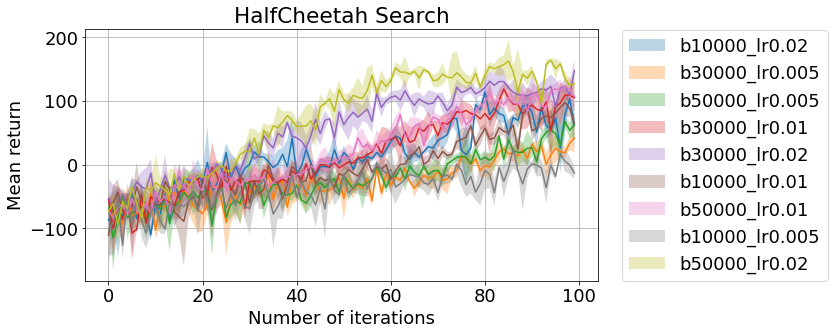

In [122]:
# single_figure(f'../../data/q2_pg_q4_search*/events*', (4,-5), 'HalfCheetah Search', None)
single_figure(f'../../data/q2_pg_q4_search*/events*', (4,-5), 'HalfCheetah Search', 'q4-1')

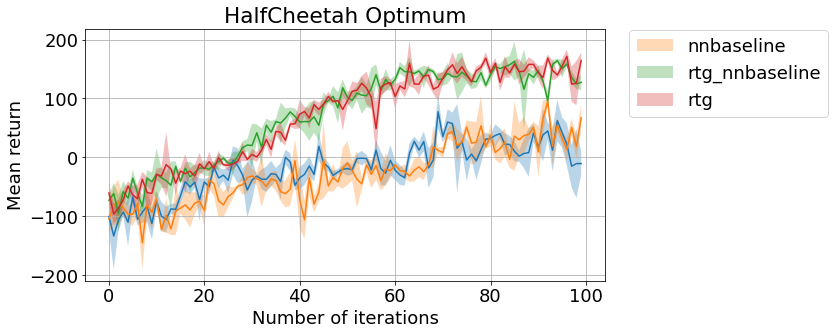

In [137]:
# single_figure(f'../../data/q2_pg_q4_b*/events*', (5,-3), 'HalfCheetah Optimum', None)
single_figure(f'../../data/q2_pg_q4_b*/events*', (5,-3), 'HalfCheetah Optimum', 'q4-2')

# Experiment 5

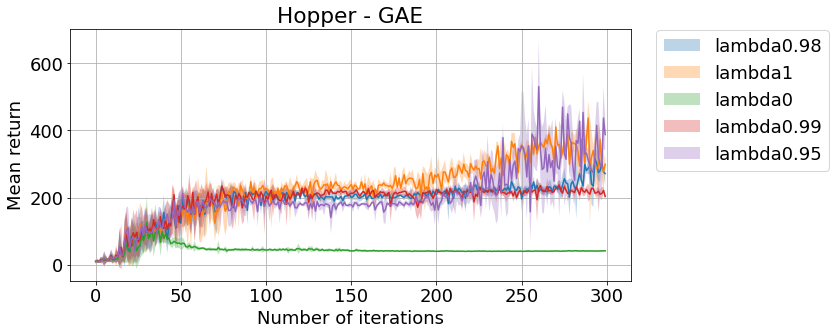

In [123]:
# single_figure(f'../../data/q2_pg_q5*/events*', (5,-3), 'Hopper - GAE', None)
single_figure(f'../../data/q2_pg_q5*/events*', (5,-3), 'Hopper - GAE', 'q5')